### Q2 

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import Binarizer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

dataset = pd.read_csv("input\P2\HCV.csv")
dataset.head(20)

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
5,6,0=Blood Donor,32,m,41.6,43.3,18.5,19.7,12.3,9.92,6.05,111.0,91.0,74.0
6,7,0=Blood Donor,32,m,46.3,41.3,17.5,17.8,8.5,7.01,4.79,70.0,16.9,74.5
7,8,0=Blood Donor,32,m,42.2,41.9,35.8,31.1,16.1,5.82,4.60,109.0,21.5,67.1
8,9,0=Blood Donor,32,m,50.9,65.5,23.2,21.2,6.9,8.69,4.10,83.0,13.7,71.3
9,10,0=Blood Donor,32,m,42.4,86.3,20.3,20.0,35.2,5.46,4.45,81.0,15.9,69.9


In [2]:
dataset.tail(20)

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
595,596,3=Cirrhosis,56,m,27.0,81.1,17.0,319.8,37.0,1.42,3.54,66.9,93.7,65.3
596,597,3=Cirrhosis,56,m,23.0,105.6,5.1,123.0,43.0,1.80,2.40,62.7,35.9,62.8
597,598,3=Cirrhosis,56,m,30.0,40.4,0.9,80.3,119.0,1.88,1.43,79.3,17.6,54.2
598,599,3=Cirrhosis,58,m,31.0,143.1,7.0,181.8,58.0,3.29,3.92,66.4,273.7,78.1
599,600,3=Cirrhosis,59,m,36.0,49.7,5.2,110.1,37.0,2.29,3.68,118.2,56.9,74.8
600,601,3=Cirrhosis,59,m,27.0,73.8,4.0,65.2,209.0,2.47,3.61,71.7,28.5,60.6
601,602,3=Cirrhosis,59,m,31.0,86.3,5.4,95.4,117.0,1.57,3.51,60.5,53.6,68.5
602,603,3=Cirrhosis,61,m,39.0,102.9,27.3,143.2,15.0,5.38,4.88,72.3,400.3,73.4
603,604,3=Cirrhosis,65,m,NaN,NaN,40.0,54.0,13.0,7.50,NaN,70.0,107.0,79.0
604,605,3=Cirrhosis,74,m,23.0,34.1,2.1,90.4,22.0,2.50,3.29,51.0,46.8,57.1


In [3]:
def pre_procces_dataset(dataset,column_array,names):
    print(dataset.isna().sum())
    dataset['Sex'].replace(['m', 'f'],[0, 1], inplace=True)
    dataset['Category'].replace(names,[0, 0, 1, 2, 3], inplace=True)
    for i in column_array:
        dataset[i].fillna(dataset[i].mean(), inplace=True)
    dataset.drop(columns="Unnamed: 0", inplace=True)
    print(dataset)
    print("pre_process completed ... ")
    return (dataset.drop(columns='Category') - dataset.drop(columns='Category').mean()
           ) /( dataset.drop(columns='Category').max() - dataset.drop(columns='Category').min()
              ) , dataset['Category']


In [4]:
# ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder= 'passthrough')
# x = np.array(ct.fit_transform(x))
names = ['0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis', '2=Fibrosis', '3=Cirrhosis']
column_array = ['ALP','ALB','ALT','CHOL','PROT']
array = dataset.values
# x = dataset.iloc[:, :-1].values 
# y = dataset.iloc[:, -1].values
# imputa = SimpleImputer(missing_values = np.nan, strategy = 'mean')
# imputa.fit(x[:, 4:])
# x[:, 4:] = imputa.transform(x[:, 4:])

In [5]:
x , y = pre_procces_dataset(dataset ,column_array,names)

Unnamed: 0     0
Category       0
Age            0
Sex            0
ALB            1
ALP           18
ALT            1
AST            0
BIL            0
CHE            0
CHOL          10
CREA           0
GGT            0
PROT           1
dtype: int64
     Category  Age  Sex   ALB        ALP    ALT    AST   BIL    CHE  CHOL  \
0           0   32    0  38.5   52.50000    7.7   22.1   7.5   6.93  3.23   
1           0   32    0  38.5   70.30000   18.0   24.7   3.9  11.17  4.80   
2           0   32    0  46.9   74.70000   36.2   52.6   6.1   8.84  5.20   
3           0   32    0  43.2   52.00000   30.6   22.6  18.9   7.33  4.74   
4           0   32    0  39.2   74.10000   32.6   24.8   9.6   9.15  4.32   
..        ...  ...  ...   ...        ...    ...    ...   ...    ...   ...   
610         3   62    1  32.0  416.60000    5.9  110.3  50.0   5.57  6.30   
611         3   64    1  24.0  102.80000    2.9   44.4  20.0   1.54  3.02   
612         3   64    1  29.0   87.30000    3.5   99.0  

In [6]:
x

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,-0.265657,-0.386992,-0.046362,-3.894379e-02,-0.063967,-0.040480,-0.015390,-0.084499,-0.259478,0.023072,-0.042440,-0.067348
1,-0.265657,-0.386992,-0.046362,4.974292e-03,-0.032216,-0.032184,-0.029608,0.198357,-0.068944,-0.006804,-0.037025,0.098581
2,-0.265657,-0.386992,0.078452,1.583045e-02,0.023888,0.056840,-0.020919,0.042920,-0.020400,0.004399,-0.009798,0.160528
3,-0.265657,-0.386992,0.023474,-4.017745e-02,0.006625,-0.038884,0.029634,-0.057814,-0.076226,-0.001202,-0.008869,0.080882
4,-0.265657,-0.386992,-0.035961,1.435006e-02,0.012790,-0.031865,-0.007096,0.063600,-0.127197,-0.004937,-0.014903,-0.073985
...,...,...,...,...,...,...,...,...,...,...,...,...
610,0.251584,0.613008,-0.142945,8.594031e-01,-0.069515,0.240950,0.152462,-0.175226,0.113095,-0.023889,0.945803,-0.078410
611,0.286067,0.613008,-0.261816,8.516181e-02,-0.078763,0.030675,0.033978,-0.444072,-0.284963,-0.017074,-0.005621,-0.016463
612,0.286067,0.613008,-0.187521,4.691853e-02,-0.076914,0.204894,0.144563,-0.436066,-0.210934,-0.013619,0.038160,0.220262
613,-0.024278,0.613008,-0.128086,-3.506256e-17,0.032519,0.086834,0.033978,-0.309315,-0.141760,-0.027344,0.016192,-0.023100


### Part B

In [7]:
def CityBlock(input: np.ndarray):
    return np.sum(np.abs(input))

def Euclidian(input: np.ndarray):
    return math.sqrt(np.sum(np.power(input, 2)))

In [8]:
import math
import random
def merging(start: np.ndarray, end: np.ndarray, metric, convergence_ratio=0.01) -> bool:
    x_check = start - end
    if convergence_ratio > metric(x_check):
        return True
    return False
def predict(self, X):
    self.centroids = np.zeros((self.K, self.n_features))
    random_sample_idxs = np.random.choice(self.n_samples, self.K, replace=False)
    for i in range(self.K):
        self.centroids[i, :] = X_train[random.randint(0, int(460) - 1), :]
def KMeans(X_train: pd.DataFrame, ClusterCount, iteration, ConvergenceRatio, DistanceMetric) -> list:
    init_centers = np.zeros((ClusterCount, X_train.shape[1]))
    sum_value = 0
    if DistanceMetric == 'CityBlock':
        metric = CityBlock
    elif DistanceMetric == 'Euclidean':
        metric = Euclidian
    else:
        return -1
    for i in range(ClusterCount):
        init_centers[i, :] = X_train[random.randint(0, X_train.shape[0] - 1), :]
    def all_labels(self, clusters):
        centroids = np.zeros((self.K, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X.iloc[cluster,:], axis=0)
            centroids[cluster_idx] = cluster_mean
        self.X = X
        self.n_samples, self.n_features = X.shape
        self.centroids = np.zeros((self.K, self.n_features))
        labels = np.empty(self.n_samples)
        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                labels[sample_idx] = cluster_idx
        return labels
    while True:
        sum_value += 1
        cluster_lists = []
        for i in range(ClusterCount):
            cluster_lists.append(set())
        for i in range(X_train.shape[0]):
            evaluation_metric = []
            for center_index in range(ClusterCount):
                evaluation_metric.append(metric(X_train[i, :] - init_centers[center_index, :]))
            evaluation_metric = np.array(evaluation_metric)
            min_cluster_index = np.where(evaluation_metric == evaluation_metric.min())[0][0]
            cluster_lists[min_cluster_index].add(i)
        new_centers = np.zeros((ClusterCount, X_train.shape[1]), dtype=float)
        for i in range(ClusterCount):
            sum_vectors = np.zeros(X_train.shape[1])
            for row_number in cluster_lists[i]:
                sum_vectors += X_train[row_number, :]
            if len(cluster_lists[i]) != 0:
                new_centers[i, :] = sum_vectors / len(cluster_lists[i])
            else:
                new_centers[i, :] = X_train[random.randint(0, X_train.shape[1] - 1), :] 
        if merging(init_centers, new_centers, metric, convergence_ratio=ConvergenceRatio):
            init_centers = new_centers
            break
        init_centers = new_centers
        if sum_value >= iteration:
            break
    return init_centers
from numpy import array
def d(center, data):
    return np.sqrt(np.sum(((center - data) ** 2), axis=1))

def calculate_purity(y, y_specific):
    unique_values = np.unique(y)
    purity = 0
    for val in unique_values:
        cluster_index = np.where(array(y) == val)[0]
        most_frequent_label = y_specific[cluster_index].mode()[0]
        purity += y_specific[cluster_index][y_specific[cluster_index] == most_frequent_label].shape[0]
    purity /= len(y)
    return round(purity, 3)

def label_handler(d, data, center):
    result = []
    for center in center:
        result.append(d(center, data))
    return [np.argmin(x) for x in array(result).T], array(result).T.min(axis=1)

def calculate_entropy(y, predict):
    u,e = np.unique(y),0
    for i in u:
        e += -(len(np.where(array(y) == i)[0]) / len(y)) * np.sum(
            list(map(lambda x: (x / len(np.where(array(y) == i)[0])) * np.log2(
                x / len(np.where(array(y) == i)[0])), predict[np.where(
                array(y) == i)[0]].value_counts().tolist())))
    return round(e, 3)

def calculate_acc(x, predict):
    labels, _ = label_handler(d, x, answer)
    u,count = np.unique(labels),0
    for val in u:
        count += predict[np.where(array(
            labels) == val)[0]][predict[np.where(array(
            labels) == val)[0]] == predict[np.where(array(labels) == val)[0]].mode()[0]].shape[0]
    return round(count / x.shape[0], 3)

In [9]:
KMeans(x.to_numpy(), 3, 30, 0.01 , DistanceMetric = 'CityBlock').shape

(3, 12)

In [10]:
KMeans(x.to_numpy(), 3, 30, 0.01 , DistanceMetric = 'CityBlock')

array([[ 5.35098817e-03,  6.13008130e-01, -1.57645133e-02,
         1.55534393e-03, -1.59608665e-02, -1.73798522e-02,
        -1.08630706e-02, -3.12922696e-02,  5.12415911e-03,
        -9.32284944e-03, -1.41728372e-02, -7.69730797e-03],
       [ 1.47446033e-01, -3.86991870e-01, -1.93286708e-01,
         2.25794157e-02, -2.88372822e-02,  2.28760876e-01,
         1.77485198e-01, -2.93224426e-01, -1.96623205e-01,
         1.09571423e-02,  1.34391753e-01, -1.98194056e-01],
       [-1.40900171e-02, -3.86991870e-01,  2.43867098e-02,
        -2.65527627e-03,  1.28398247e-02, -4.49607127e-03,
        -5.26056572e-03,  4.19834398e-02,  1.05000859e-02,
         5.52531139e-03,  3.79017989e-05,  1.92807122e-02]])

In [11]:
KMeans(x.to_numpy(), 3, 30, 0.01 , DistanceMetric = 'CityBlock').ndim

2

### Part C

### Elbow chart to find the best k for num of clusters

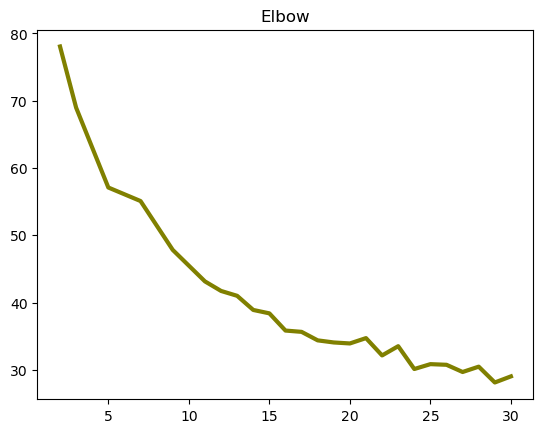

In [12]:
def estimator(array: list):
    return np.sum(np.power(np.array(array), 2))

def distance_for_clusters(input: np.ndarray, points: np.ndarray, d):
#     print("QQQQQQQQQQQQQQ")
    result_array = []
    for i in range(points.shape[0]):
        result_array.append(d(input - points[i, :]))
    return np.array(result_array).min(), np.where(result_array == np.array(result_array))[0][0]

def sample_handler(input_val):
    for i, j in input_val.iterrows():
        clusters[centroids._closest_centroid(j, centroids)].append(i)
    return clusters

result_part_c , K_array = [],[2,3,5,7,9,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]
for value in K_array:
    points,distances = KMeans(x.to_numpy(), value,30,0.01,DistanceMetric = 'CityBlock'),[]
    for i in range(x.to_numpy().shape[0]):
        mininmum, index = distance_for_clusters(x.to_numpy()[i, :], points, Euclidian)
        distances.append(mininmum)
    result_part_c.append(estimator(distances))
plt.title('Elbow')
plt.plot(K_array, result_part_c, color= "olive" , linewidth = "3")
plt.show()

### samples preview on semi-optimal models to find the best threshold for outlier

C:\Users\mmmoh\AppData\Local\Temp\ipykernel_8692\3714360067.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(np.arange(1, x.to_numpy().shape[0] + 1), sorted(distances


Text(0.5, 1.0, 'K=12')

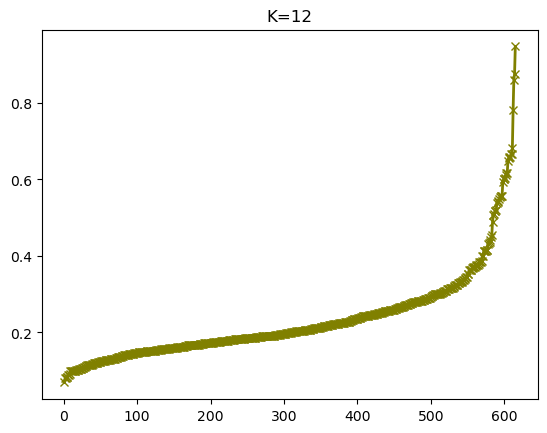

In [13]:
points,distances = KMeans(x.to_numpy(), 12, 30, 0.01,DistanceMetric = 'CityBlock'),[]
for i in range(x.to_numpy().shape[0]):
    minimum, index = distance_for_clusters(x.to_numpy()[i, :], points, Euclidian)
    distances.append(minimum)
plt.plot(np.arange(1, x.to_numpy().shape[0] + 1), sorted(distances
                                                        ), 'bx-', linewidth = 2, color = "olive")
plt.title('K=12')

C:\Users\mmmoh\AppData\Local\Temp\ipykernel_8692\3933712044.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(np.arange(1, x.to_numpy().shape[0] + 1), sorted(distances


Text(0.5, 1.0, 'K=13')

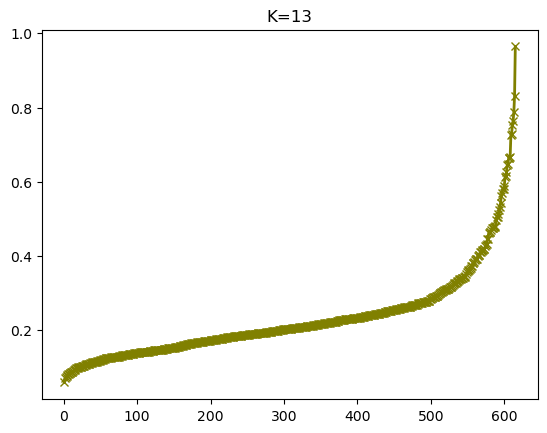

In [14]:
points,distances = KMeans(x.to_numpy(), 13, 30, 0.01,DistanceMetric = 'CityBlock'),[]
for i in range(x.to_numpy().shape[0]):
    minimum, index = distance_for_clusters(x.to_numpy()[i, :], points, Euclidian)
    distances.append(minimum)
plt.plot(np.arange(1, x.to_numpy().shape[0] + 1), sorted(distances
                                                        ), 'bx-', linewidth = 2, color = "olive")
plt.title('K=13')

C:\Users\mmmoh\AppData\Local\Temp\ipykernel_8692\1183682388.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(np.arange(1, x.to_numpy().shape[0] + 1), sorted(distances


Text(0.5, 1.0, 'K=14')

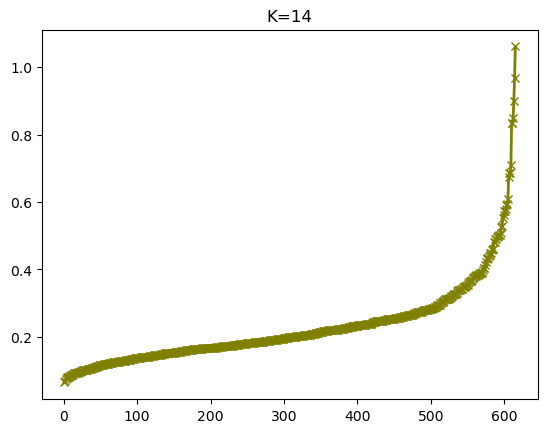

In [15]:
points,distances = KMeans(x.to_numpy(), 14, 30, 0.01,DistanceMetric = 'CityBlock'),[]
for i in range(x.to_numpy().shape[0]):
    minimum, index = distance_for_clusters(x.to_numpy()[i, :], points, Euclidian)
    distances.append(minimum)
plt.plot(np.arange(1, x.to_numpy().shape[0] + 1), sorted(distances
                                                        ), 'bx-', linewidth = 2, color = "olive")
plt.title('K=14')

C:\Users\mmmoh\AppData\Local\Temp\ipykernel_8692\1085509509.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(np.arange(1, x.to_numpy().shape[0] + 1), sorted(distances


Text(0.5, 1.0, 'K=15')

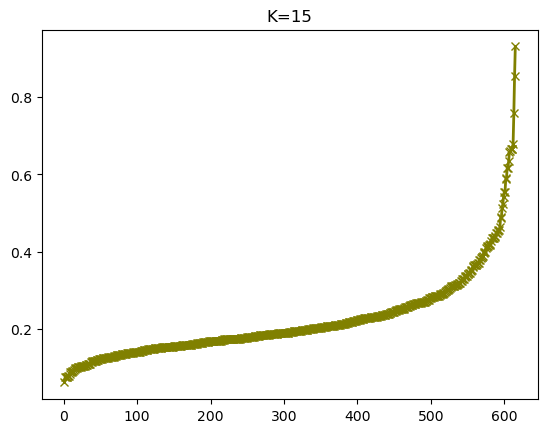

In [16]:
points,distances = KMeans(x.to_numpy(), 15, 30, 0.01,DistanceMetric = 'CityBlock'),[]
for i in range(x.to_numpy().shape[0]):
    minimum, index = distance_for_clusters(x.to_numpy()[i, :], points, Euclidian)
    distances.append(minimum)
plt.plot(np.arange(1, x.to_numpy().shape[0] + 1), sorted(distances
                                                        ), 'bx-', linewidth = 2, color = "olive")
plt.title('K=15')

### based on the all of semi optimal models, 0.49 could be a great threshold

In [17]:
count,optimal_limit = 0, 0.49
for value in range(x.to_numpy().shape[0]):
    limit, _ = distance_for_clusters(x.to_numpy()[value, :], points, Euclidian)
    if limit > optimal_limit:
        count += 1
        x.drop(value, axis=0, inplace=True)
        y.drop(value, axis=0, inplace=True)
print("Outlier percentage: ", count / x.to_numpy().shape[0] * 100 )

Outlier percentage:  4.060913705583756


### Part D

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
answer = KMeans(x_train.to_numpy(), 2, 30, 0.01 , DistanceMetric = 'CityBlock')

### Part E

In [28]:
def label_mapping(input_label):
    if input_label == 0:
        return 0
    return 1
y_label_test,y_label_train = np.vectorize(label_mapping)(y_test), np.vectorize(label_mapping)(y_train)
y_train.reset_index(inplace=True, drop=True)
y_test.reset_index(inplace=True, drop=True) 

current_result_E, index = label_handler(d, x_train, KMeans(
    x_train.to_numpy(), 2, 30, 0.01 , DistanceMetric = 'CityBlock'))
print("Report results:")
print("______________________")
print("Accuracy: ", calculate_acc(x_test, y_train.replace(
    {"0s=suspect Blood Donor": "0=Blood Donor", "2=Fibrosis": "1=Hepatitis", "3=Cirrhosis": "1=Hepatitis"})))
print("Purity:   ", calculate_purity(current_result_E, y_train.replace(
    {"0s=suspect Blood Donor": "0=Blood Donor", "2=Fibrosis": "1=Hepatitis", "3=Cirrhosis": "1=Hepatitis"})))
print("Entropy:  ",calculate_entropy(current_result_E, y_train.replace(
    {"0s=suspect Blood Donor": "0=Blood Donor", "2=Fibrosis": "1=Hepatitis", "3=Cirrhosis": "1=Hepatitis"})))


Report results:
______________________
Accuracy:  0.916
Purity:    0.888
Entropy:   0.658


### Part F

In [30]:
current_result_F, indx = label_handler(d, x_train, KMeans(
    x_train.to_numpy(), 4, 30, 0.01 , DistanceMetric = 'CityBlock'))

print("Entropy: ", calculate_entropy(
    current_result_F,y_train.replace({"0s=suspect Blood Donor": "0=Blood Donor"})))
print("Purity:  ",calculate_purity(
    current_result_F, y_train.replace({"0s=suspect Blood Donor": "0=Blood Donor"})))
print("Accuracy:", 
      calculate_acc(x_test,y_train.replace({"0s=suspect Blood Donor": "0=Blood Donor"})))
print()

Entropy:  0.559
Purity:   0.903
Accuracy: 0.916

